## Titanic Machine Learning

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Base de Dados
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Tamanho da base de dados
df.shape

(891, 12)

In [4]:
# Informação
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Valores estatístico
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Valores Únicos
df.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

### Limpeza de Dados

In [7]:
# Cria um dataframe com os valores null
def columnsNull(dataset):
    df_nulos = pd.DataFrame(dataset.isnull().sum())
    valor = []
    indice = []
    for i, r in df_nulos.iterrows():
        if r[0] > 0:
            indice.append(i)
            valor.append(r[0])
    df_nulos = pd.DataFrame(np.array(valor).reshape(1, -1), columns=indice)
    return df_nulos

columnsNull(df)

,Age,Cabin,Embarked
0,177,687,2


In [8]:
# Valores vazios NAs em embarque
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
# Atribuído o valores corretos 
df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'
df.Embarked.isnull().sum()

0

In [10]:
# Valores NAs em idades e a média
df['Age'].isnull().sum(), df['Age'].mean()

(177, 29.69911764705882)

In [11]:
# Agrupando as idades por gênero e classe
idade = df.groupby(['Pclass', 'Sex'])['Age'].transform('mean')
idade = round(idade, 1)
idade

0      26.5
1      34.6
2      21.8
3      34.6
4      26.5
       ... 
886    30.7
887    34.6
888    21.8
889    41.3
890    26.5
Name: Age, Length: 891, dtype: float64

In [12]:
# Substituído o valor NAs
df['Age'] = df['Age'].fillna(idade)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,26.5,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
# Visualizando NAs em Idade
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
# Eliminado as colunas PassengerId, Ticket e name
df = df.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
# Informação
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Análise Exploratória de Dados

In [16]:
# Lib
from ydata_profiling import ProfileReport

# Gerando relatório sobre a base de treino
profile = ProfileReport(df, title="Relatório de Criação de Perfil")

# Exportando com HTML
profile.to_file("relatorio.html")

c:\Projeto-Kaggle\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 93.95it/s]


### Gráficos

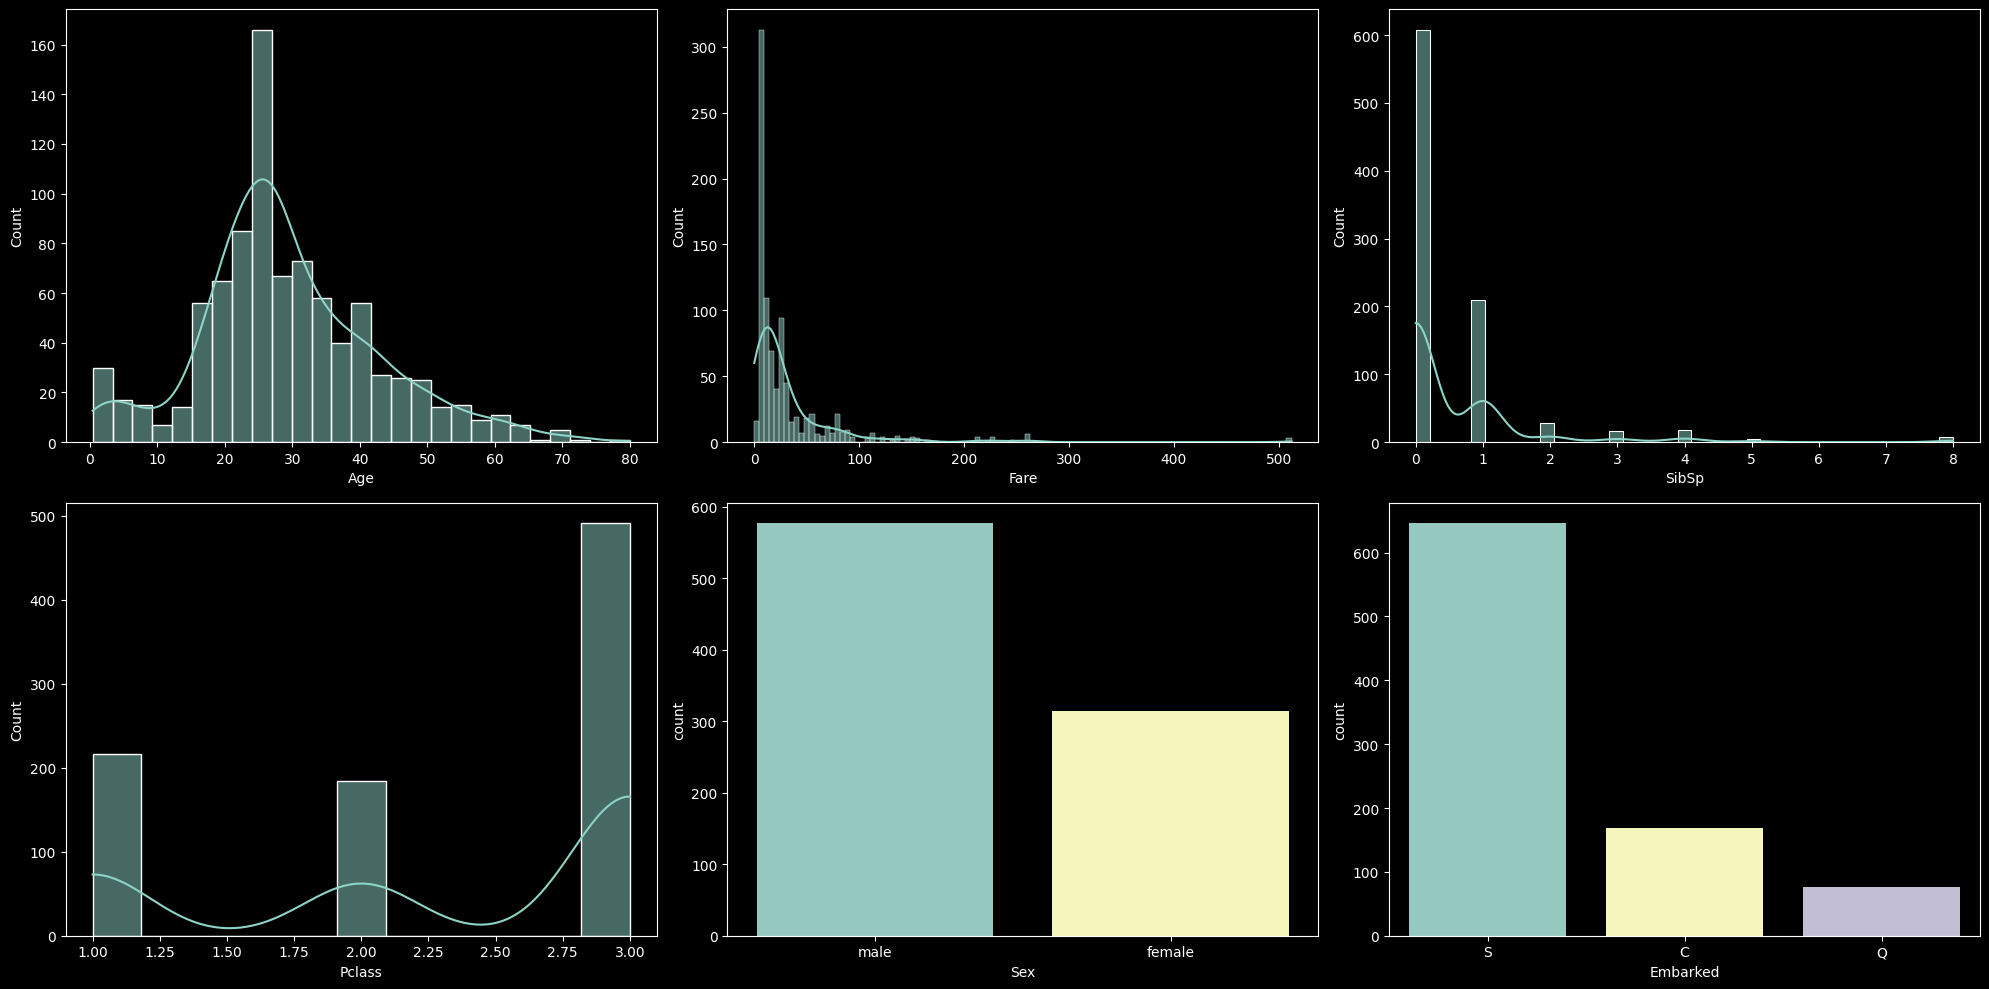

In [17]:
# Gráfico
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
# Histograma
sns.histplot(df['Age'], kde=True);
plt.subplot(2,3,2)
sns.histplot(df['Fare'], kde=True);
plt.subplot(2,3,3)
sns.histplot(df['SibSp'], kde=True);
plt.subplot(2,3,4)
sns.histplot(df['Pclass'], kde=True);
# Gráfico de variável 
plt.subplot(2,3,5)
sns.countplot(x=df['Sex']);
plt.subplot(2,3,6)
sns.countplot(x=df['Embarked']);
plt.tight_layout()

### Separando as variáveis de classificação e previsores

In [18]:
# Criando as variáveis de classificação e previsores
X = df.iloc[:,1:8].values
y = df.iloc[:, 0].values
X

array([[3, 'male', 22.0, ..., 0, 7.25, 'S'],
       [1, 'female', 38.0, ..., 0, 71.2833, 'C'],
       [3, 'female', 26.0, ..., 0, 7.925, 'S'],
       ...,
       [3, 'female', 21.8, ..., 2, 23.45, 'S'],
       [1, 'male', 26.0, ..., 0, 30.0, 'C'],
       [3, 'male', 32.0, ..., 0, 7.75, 'Q']], dtype=object)

### Transformação dos atributos categóricos em atributos numéricos

In [19]:
# Bibliotecas
from sklearn.preprocessing import LabelEncoder
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada coluna categórica
labelencoder1 = LabelEncoder()
X[:,1] = labelencoder1.fit_transform(X[:,1])

labelencoder2 = LabelEncoder()
X[:,6] = labelencoder2.fit_transform(X[:,6])

X


array([[3, 1, 22.0, ..., 0, 7.25, 2],
       [1, 0, 38.0, ..., 0, 71.2833, 0],
       [3, 0, 26.0, ..., 0, 7.925, 2],
       ...,
       [3, 0, 21.8, ..., 2, 23.45, 2],
       [1, 1, 26.0, ..., 0, 30.0, 0],
       [3, 1, 32.0, ..., 0, 7.75, 1]], dtype=object)

### Modelo de Machine Learning

In [20]:
# Bibliotecas
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [21]:
# Treinado o modelo
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(
    X, y, test_size = 0.25, random_state = 42
)

In [22]:
# Criação e treinamento do modelo
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier()

In [23]:
# Criação e treinamento do modelo (geração da tabela de probabilidades)
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

In [24]:
# Previsões utilizando os registros de teste
nb_previsoes = naive_bayes.predict(X_teste)
# visualizando a taxa de acerto
nb_taxa_acerto = accuracy_score(y_teste, nb_previsoes)
nb_taxa_acerto

0.7847533632286996

In [25]:
# Obtenção das previsões
arvore_previsoes = arvore.predict(X_teste)
#taxa acerto
arvore_taxa_acerto = accuracy_score(y_teste, arvore_previsoes)
arvore_taxa_acerto

0.7354260089686099

In [26]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto
floresta = RandomForestClassifier(n_estimators = 100 , n_jobs=-1)
floresta.fit(X_treinamento, y_treinamento)

RandomForestClassifier(n_jobs=-1)

In [27]:
# Fazendo a previsões
floresta_previsoes = floresta.predict(X_teste)
floresta_taxa_acerto = accuracy_score(y_teste, floresta_previsoes)
floresta_taxa_acerto

0.8071748878923767

### Base de Teste

In [28]:
# Base de dados de teste
df_test = pd.read_csv('./data/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
# Tamanho
df_test.shape

(418, 11)

In [30]:
# Valores nulos
columnsNull(df_test)

,Age,Fare,Cabin
0,86,1,327


### Tratando valores Nulos nos dados de teste

In [31]:
# Eliminado a coluna Cabin
df_test = df_test.drop('Cabin', axis=1)
df_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [32]:
# Valores vazios NAs em embarque
df_test[df_test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [33]:
# Agrupando o fare por gênero e classe
fare = df_test.groupby(['Pclass', 'Sex'])['Fare'].transform('mean')
fare

0       11.826350
1       13.735129
2       20.184654
3       11.826350
4       13.735129
          ...    
413     11.826350
414    115.591168
415     11.826350
416     11.826350
417     11.826350
Name: Fare, Length: 418, dtype: float64

In [34]:
# Substituído o valor NAs
df_test['Fare'] = df_test['Fare'].fillna(fare)
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


In [35]:
# Agrupando as idades por gênero e classe
idade_test = df_test.groupby(['Pclass', 'Sex'])['Age'].transform('mean')
idade_test = round(idade_test, 1)
idade_test

0      24.5
1      23.1
2      30.9
3      24.5
4      23.1
       ... 
413    24.5
414    41.3
415    24.5
416    24.5
417    24.5
Name: Age, Length: 418, dtype: float64

In [36]:
# Substituído o valor NAs
df_test['Age'] = df_test['Age'].fillna(idade_test)
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


In [37]:
# Sem valores null
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [38]:
survivor1 = df_test['PassengerId']
survivor2 = df_test['PassengerId']
survivor3 = df_test['PassengerId']
ds_survivor1 = pd.DataFrame(survivor1)
ds_survivor2 = pd.DataFrame(survivor2)
ds_survivor3 = pd.DataFrame(survivor2)
ds_survivor1.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [39]:
# Eliminado as colunas PassengerId, Ticket e name
df_test = df_test.drop(['PassengerId', 'Ticket', 'Name'], axis=1)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [40]:
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada coluna categórica
df_teste = df_test.iloc[:, 0:7].values

labelencoderT1 = LabelEncoder()
df_teste[:,1] = labelencoder1.fit_transform(df_teste[:,1])

labelencoderT2 = LabelEncoder()
df_teste[:,6] = labelencoder2.fit_transform(df_teste[:,6])

In [41]:
result1 = floresta.predict(df_teste)
result2 = arvore.predict(df_teste)
result3 = naive_bayes.predict(df_teste)
ds_survivor1['Survived'] = result1
ds_survivor2['Survived'] = result2
ds_survivor3['Survived'] = result3

### Dados para a submissão

In [42]:
ds_survivor1.to_csv('floresta.csv', index=False)
ds_survivor2.to_csv('arvore.csv', index=False)
ds_survivor3.to_csv('naive_bayes.csv', index=False)

## Dados de submissão 

In [43]:
ds_sub = pd.read_csv('./data/gender_submission.csv')
ds_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
